Kiet Nguyen

ID: 001601720

Email: kngu179@wgu.edu

**Part I: Research Question**

*A. Question to address*

What variables in the dataset can help predict which customers are most likely to discontinue service?

*B. Variables description*

```
import pandas as pd

# Import CSV file to Pythondf.
churn = pd.read_csv('churn_raw_data.csv')

churn.shape             # Return the rows x columns of dataset
churn.info()            # Print summary of dataframe
```

Running the above code, the output shows that the dataset contains 52 variables and 10,000 records. The variable we are interested in is `Churn`, whether the customer discontinued service within the last month. The dataset also includes services that each customer signed up for, customer account information, and customer demographics. The data types of the variables are `int64`, `object`, and `float64`.

**Part II: Data Cleaning Plan**

*C1. Plan to identify anomalies*

My plan to find the anomalies include the following steps:

- Learn about the dataset and its characteristics.
- Explore measures of central tendency (mean, median, mode) and potential outliers.
- Summarize and visualize missing values for possible patterns.
- Impute missing data.

*C2. Approach to assess data quality*

To assess the data quality, I need to answer the following questions:

- Is the data accurate?
- How much data is missing?
- Is the data in the correct format?
- Are there duplicates?

The most difficult question to answer is about data accuracy since I do not have a baseline to compare this dataset against. The other questions can be answered through exploration of the data. Finding out how much data is missing will help me to avoid poor estimations and analysis based on incomplete data (Donthi, 2021). Incorrect formatting is another issue that can cause problems with processing data. Having a lot of duplicates can also skew the results of the analysis.

*C3. Language and libraries*

For the analysis of the data, I will use Python. It is a powerful general purpose programming language with an easy to read syntax. It also provides specialized libraries for working with data science projects.

A. Nehme (2021) recommended the following Python libraries for data cleaning:

- `pandas` - data manipulation and analysis.
- `numpy` - math functions and multidimensional arrays and matrices support.
- `matplotlib` - data visualization.
- `missingno` - missing data visualization.
- `scikit-learn` - machine learning models.

*C4. Code to identify anomalies*

In [26]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Import CSV to dataframe
churn = pd.read_csv('churn_raw_data.csv')

In [27]:
# Return the rows x columns of dataset
churn.shape

(10000, 52)

In [28]:
# Print summary of dataframe
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [29]:
# See first 5 rows
churn.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [30]:
# Get statistics of numeric columns
churn.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [31]:
# Get statistics of non-numeric columns
churn.describe(include=object)

,Customer_id,Interaction,City,State,County,Area,Timezone,Job,Education,Employment,...,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,8974,10000,10000,10000,10000,9009,10000,10000,10000,10000
unique,10000,10000,6058,52,1620,3,25,639,12,5,...,2,2,2,2,2,2,2,2,2,4
top,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Houston,TX,Washington,Suburban,America/New_York,Occupational psychologist,Regular High School Diploma,Full Time,...,Yes,No,No,No,No,No,No,No,Yes,Electronic Check
freq,1,1,34,603,111,3346,4072,30,2421,5992,...,8128,5392,6424,5494,5614,5635,5071,5110,5882,3398


In [32]:
# Check if there is any duplicate across all columns
duplicates = churn.duplicated().any()

# No duplicate found
duplicates

False

In [33]:
# Print unique values of each categorical column
# Print total if there are more than 15 unique values
for column in churn:
    if churn[column].dtype == object:
        print(column)
        uniques = churn[column].unique()
        if len(uniques) > 15:
            print(f'- {len(uniques)}')
        else:
            print(f'- {churn[column].unique()}')

Customer_id
- 10000
Interaction
- 10000
City
- 6058
State
- 52
County
- 1620
Area
- ['Urban' 'Suburban' 'Rural']
Timezone
- 25
Job
- 639
Education
- ["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9th Grade to 12th Grade, No Diploma' 'Nursery School to 8th Grade'
 'Professional School Degree']
Employment
- ['Part Time' 'Retired' 'Student' 'Full Time' 'Unemployed']
Marital
- ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
Gender
- ['Male' 'Female' 'Prefer not to answer']
Churn
- ['No' 'Yes']
Techie
- ['No' 'Yes' nan]
Contract
- ['One year' 'Month-to-month' 'Two Year']
Port_modem
- ['Yes' 'No']
Tablet
- ['Yes' 'No']
InternetService
- ['Fiber Optic' 'DSL' 'None']
Phone
- ['Yes' 'No' nan]
Multiple
- ['No' 'Yes']
OnlineSecurity
- ['Yes' 'No']
OnlineBackup
- ['Yes' 'No']
DeviceProtec

In [34]:
# Explore columns with missing values similar to the 'nan' results above
churn_null = churn.isnull()
null_sums = churn_null.sum()

# Add missing column names to a list print out missing percentage
print('Total and percentage of missing values per column')
cols_missing = []
for column, missing in null_sums.items():
    if missing > 0:
        print(f'{column}: {missing} - {round((missing / 10000) * 100, )}%')
        cols_missing.append(column)

Total and percentage of missing values per column
Children: 2495 - 25%
Age: 2475 - 25%
Income: 2490 - 25%
Techie: 2477 - 25%
Phone: 1026 - 10%
TechSupport: 991 - 10%
Tenure: 931 - 9%
Bandwidth_GB_Year: 1021 - 10%


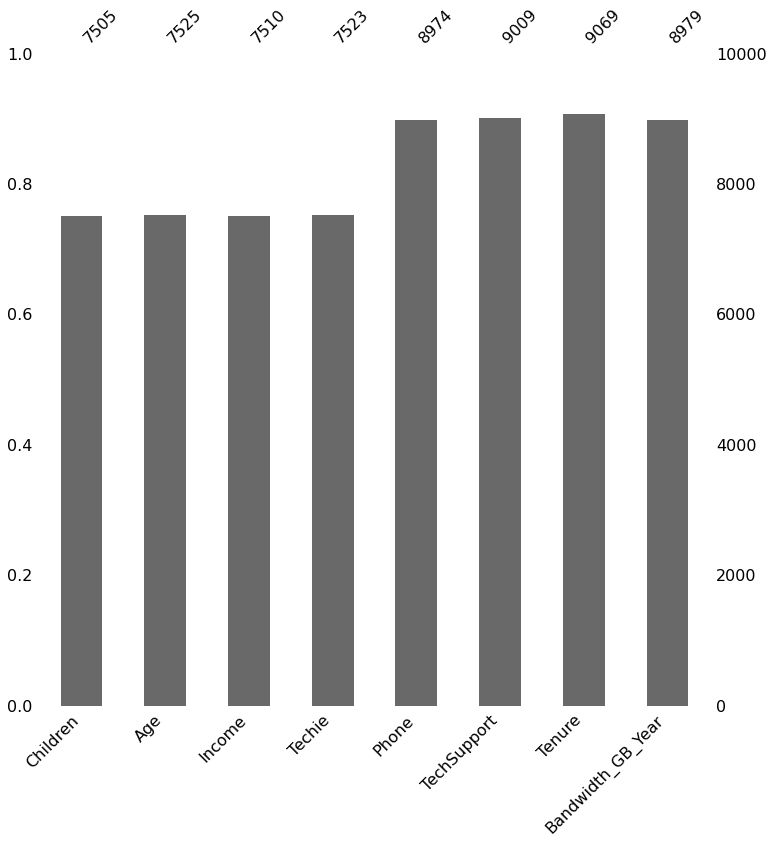

In [35]:
# Copy missing columns to new dataframe
churn_missing = churn[cols_missing].copy()

# Visualize missing data
msno.bar(churn_missing, figsize=(12, 12))
plt.show()

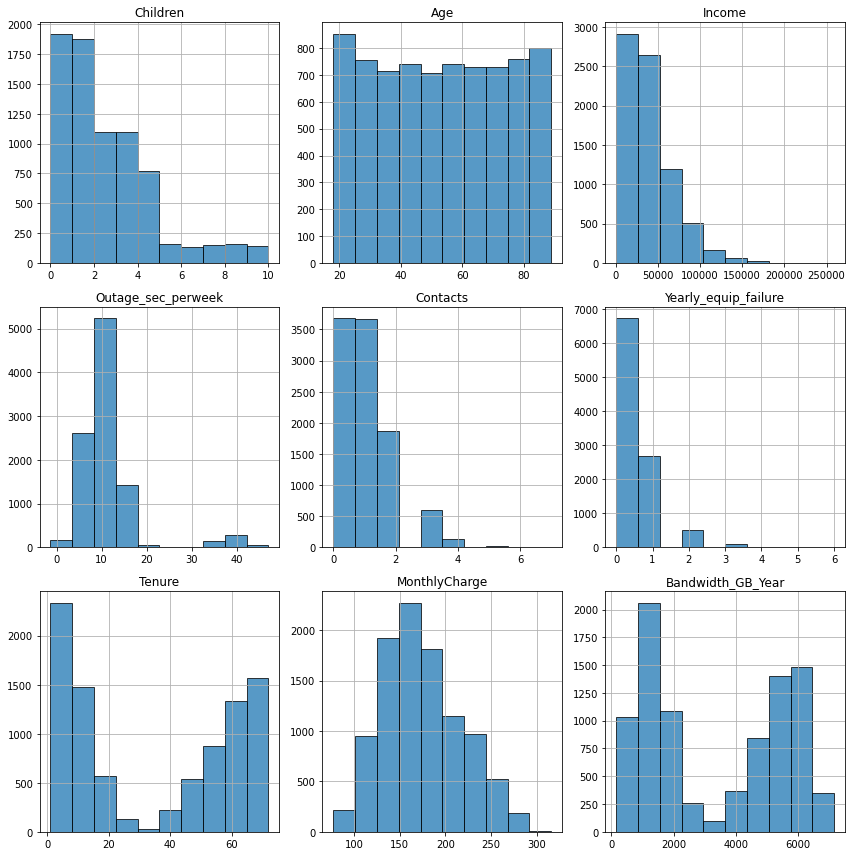

In [36]:
"""
Author: Brad Solomon
Date: 2021
Title: Python Histogram Plotting: NumPy, Matplotlib, Pandas & Seaborn
Type: Source code
Web: https://realpython.com/python-histograms/
"""

# Plot the histograms of interesting numeric columns to see patterns
churn[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist(figsize=(12, 12),
                                                                                                                                                    ec='black',
                                                                                                                                                    alpha=0.75)
plt.tight_layout()
plt.show()

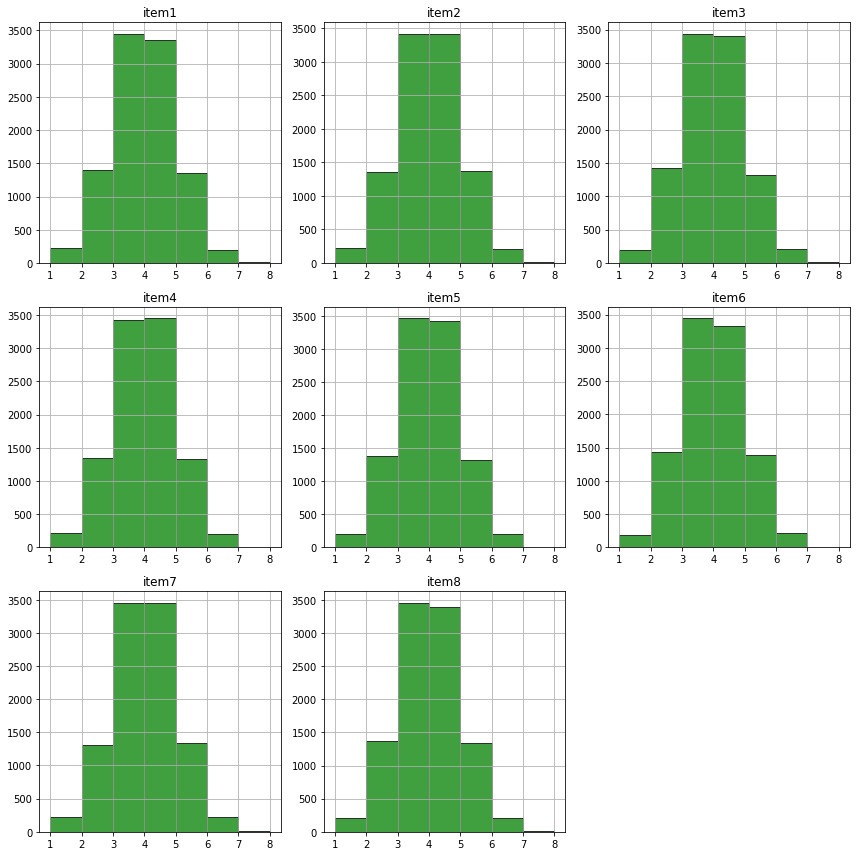

In [37]:
# Plot survey responses
churn[[f'item{i}' for i in range(1, 9)]].hist(figsize=(12, 12),
                                              ec='black',
                                              alpha=0.75,
                                              color='green',
                                              bins=[1, 2, 3, 4, 5, 6, 7, 8])
plt.tight_layout()
plt.show()

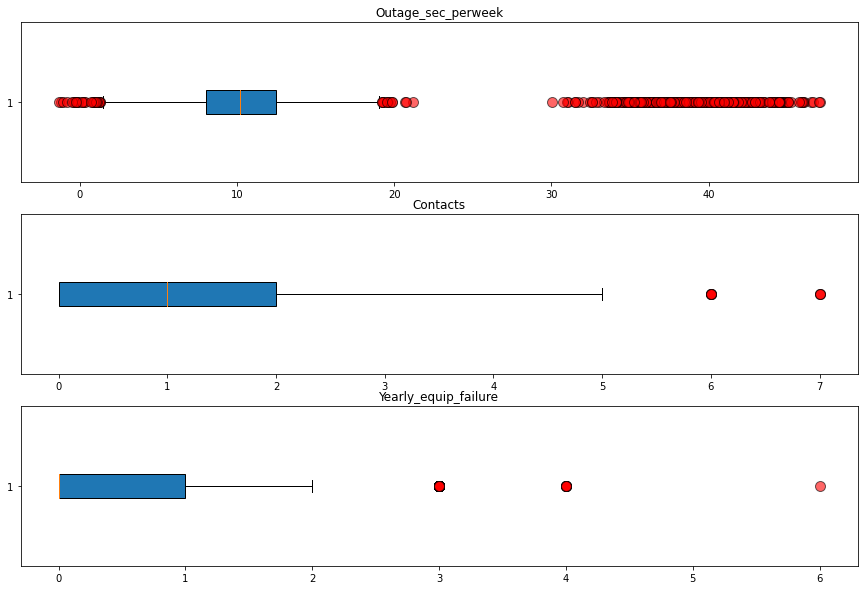

In [38]:
"""
Author: Python Pool
Date: 2021
Title: Matplotlib Boxplot With Customization in Python
Type: Source Code
Web: https://www.pythonpool.com/matplotlib-boxplot/
"""

# Verify columns with outliers using boxplots
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
for index, column in enumerate(['Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure']):
    ax[index].boxplot(
        churn[column],
        vert=False,
        patch_artist=True,
        flierprops=dict(markerfacecolor='red', markersize=10, linestyle='none', alpha=0.6)
    )
    ax[index].set_title(column)
plt.show()

**Part III: Data Cleaning**

*D1. Describe findings*

There are several anomalies in the dataset:

- Columns `Unnamed: 0` and `CaseOrder` are the same.
- Unclear column names for survey responses.
- Negative values in `Outage_sec_perweek`, where the minimum should only be zero.
- Multiple columns are missing from 9% to 25% of their data.
- Based on the histograms and boxplots, there are outliers for `Outage_sec_perweek`, `Contacts`, and `Yearly_equip_failure`.

*D2. Mitigation methods*

My approach for dealing with the anomalies will be:

- Drop `Unnamed: 0` column since it's a duplicate of `CaseOrder`.
- Rename survey responses to something easier to understand.
- Change the negative values in `Outage_sec_perweek` to 0 to enforce proper range (Nehme, 2021).
- Use K-Nearest Neighbor algorithm to predict missing values based on values of neighboring columns (Donthi, 2021).
- Leave the outliers alone since they might provide important insights for later analysis.

*D3. Outcome summary*

The outcome of each data cleaning step is:

- `Unnamed: 0` column dropped from the dataframe.
- Survey items are easier to understand.
- The minimum for `Outage_sec_perweek` is set to 0.
- Missing values are imputed using KNN algorithm. Categorical values are ordinally encoded before imputation.

*D4. Code for mitigation*

In [39]:
# Drop 'Unnamed: 0' column
churn = churn.drop('Unnamed: 0', axis=1)

In [40]:
# Rename survey responses columns
churn.rename(columns={
    'item1': 'SurveyResponse',
    'item2': 'SurveyFixes',
    'item3': 'SurveyReplacements',
    'item4': 'SurveyReliability',
    'item5': 'SurveyOptions',
    'item6': 'SurveyRespect',
    'item7': 'SurveyCourteous',
    'item8': 'SurveyListening'
}, inplace=True)

In [41]:
# Set negative values in Outage_sec_perweek to 0
churn.loc[churn['Outage_sec_perweek'] < 0, 'Outage_sec_perweek'] = 0

In [42]:
import numpy as np
from sklearn.impute import KNNImputer

# Split missing columns into numeric and categorical
num_missing = churn_missing[['Children', 'Age', 'Income', 'Tenure', 'Bandwidth_GB_Year']].copy()
cat_missing = churn_missing[['Techie', 'Phone', 'TechSupport']].copy()

# Impute numeric columns
knn = KNNImputer()
num_missing.iloc[:, :] = knn.fit_transform(num_missing)

num_missing.describe()

,Children,Age,Income,Tenure,Bandwidth_GB_Year
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,2.045900,52.99086,39976.469551,34.539410,3388.508002
std,1.917549,18.62637,25328.964531,25.539056,2108.192078
min,0.000000,18.00000,740.660000,1.000259,155.506715
25%,1.000000,39.20000,22838.322500,8.574026,1290.549139
50%,1.800000,52.40000,35629.102000,34.369232,3349.915681
75%,3.000000,67.00000,50947.115000,60.367002,5476.439000
max,10.000000,89.00000,258900.700000,71.999280,7158.982000


In [43]:
"""
Author: Suraj Donthi
Date: 2021
Title: Imputing categorical values
Type: Source code
Web: https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/advanced-imputation-techniques?ex=4
"""

from sklearn.preprocessing import OrdinalEncoder

# Perform ordinal encoding for missing categorical columns
ordinal_dict = {}
for column in cat_missing:
    # Create ordinal encoder for column
    ordinal_dict[column] = OrdinalEncoder()
    col = cat_missing[column]

    # Select non-null values and encode them
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_dict[column].fit_transform(reshaped_vals)

    # Store the encoded values back in the column
    cat_missing.loc[col.notnull(), column] = np.squeeze(encoded_vals)

# Impute missing values
cat_missing.iloc[:, :] = np.round(knn.fit_transform(cat_missing))

# Convert encoded columns back to categorical
for column in cat_missing:
    reshaped = cat_missing[column].values.reshape(-1, 1)
    cat_missing[column] = ordinal_dict[column].inverse_transform(reshaped)

cat_missing.describe()

,Techie,Phone,TechSupport
count,10000,10000,10000
unique,2,2,2
top,No,Yes,No
freq,8743,9154,6413


*D5. Copy of clean data*

In [44]:
# Create copy of churn data
churn_clean = churn.copy(deep=True)

# Replace missing columns with imputed ones
for column in churn_missing:
    if column in num_missing:
        churn_clean[column] = num_missing[column]
    elif column in cat_missing:
        churn_clean[column] = cat_missing[column]

churn_clean.to_csv('churn_clean.csv')

In [45]:
# Check the cleaned data by importing and display summary of imputed columns
cleaned_data = pd.read_csv('churn_clean.csv')

cleaned_data[['Children', 'Age', 'Income', 'Tenure', 'Bandwidth_GB_Year', 'Techie', 'Phone', 'TechSupport']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Children           10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Income             10000 non-null  float64
 3   Tenure             10000 non-null  float64
 4   Bandwidth_GB_Year  10000 non-null  float64
 5   Techie             10000 non-null  object 
 6   Phone              10000 non-null  object 
 7   TechSupport        10000 non-null  object 
dtypes: float64(5), object(3)
memory usage: 625.1+ KB


*D6. Limitations of data cleaning*

Without knowing where the data came from or how it was collected, I have to assume some uncertainty when working with it. While KNN algorithm is better than using the mean or median for imputing values (Donthi, 2021), , it does not replace real data. By imputing the values, I might lose some insight when performing analysis with the imputed values. To properly clean the data, I would need help from a domain expert, someone who understands churn in both the company and the industry. Since I'm not familiar with the industry, my data cleaning process might be very different than someone who understands the industry well.

*D7. Effects of limitation on research question*

Given that the dataset was missing a lot of data, the conclusion drawn from this data needs to be scrutinized before decisions are made from imputed values (Nehme, 2021). Predicting which customers are at high risk of churn require some degree of caution. It can be very costly for the company to predict the wrong segment of customers to retain, leading to ineffective marketing. It's also possible for the company to focus on the wrong metrics for customer retention based on erroneous data. There are also some variables in the data that need more consideration since their correlations with churn are unclear at the moment.

In [46]:
# Create dataframe with only numeric columns for PCA
churn_cp = churn_clean.select_dtypes(include=['int64', 'float64'])

# Drop columns that are not meaningful
churn_cp = churn_cp.drop(['CaseOrder', 'Zip', 'Lat', 'Lng'], axis=1)

churn_cp.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,SurveyResponse,SurveyFixes,SurveyReplacements,SurveyReliability,SurveyOptions,SurveyRespect,SurveyCourteous,SurveyListening
0,38,1.2,68.0,28561.990,6.972566,10,0,1,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,10446,1.0,27.0,21704.770,12.014541,12,0,1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3735,4.0,50.0,45759.278,10.245616,9,0,1,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,13863,1.0,48.0,18925.230,15.206193,15,2,0,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,11352,0.0,83.0,40074.190,8.960316,16,2,1,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


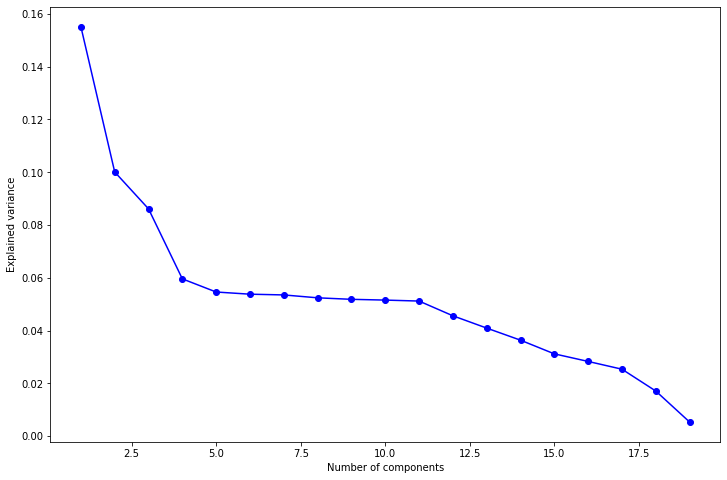

In [47]:
"""
Author: Keiona Middleton
Date: 2021
Title: How to perform PCA in Python
Type: Source code
Web: https://cgp-oex.wgu.edu/lti_provider/courses/course-v1:WGUx+D206x+2021_T3/block-v1:WGUx+D206x+2021_T3+type@vertical+block@3f0422d47d8b4a3eaec25de3bced8bf8
"""

from sklearn.decomposition import PCA

# Normalize data
churn_normalized = (churn_cp - churn_cp.mean()) / churn_cp.std()

# Extract all components for analysis
pca = PCA(n_components=churn_cp.shape[1])
pca.fit(churn_normalized)

# Converts 19 variables into dataset of 19 components
pca_cols = [f'PC{i}' for i in range(1, 20)]     # Create list of component names 'PC1' to 'PC19'
churn_pca = pd.DataFrame(pca.transform(churn_normalized),
                         columns=pca_cols)

# Scree plot of PCA with each additional component variance
pc_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(12, 8))
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', color='blue')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

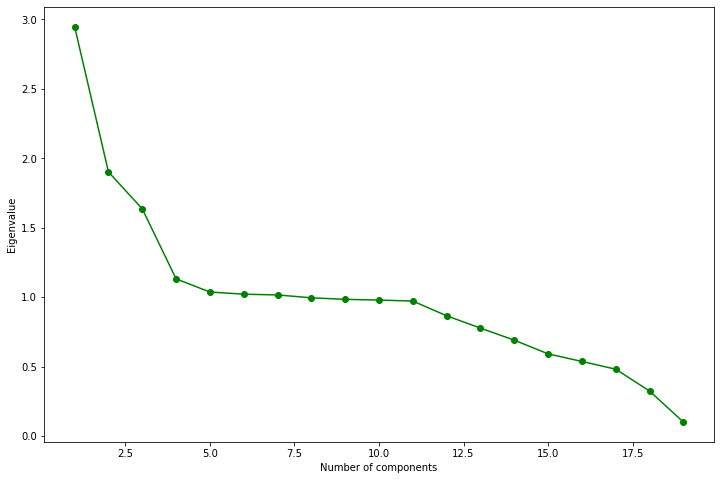

In [48]:
# Extract eigenvalues from dataset
cov_matrix = np.dot(churn_normalized.T, churn_normalized) / churn_cp.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

# Plot eigenvalues
plt.figure(figsize=(12, 8))
plt.plot(pc_values, eigenvalues, 'o-', color='green')
plt.xlabel('Number of components')
plt.ylabel('Eigenvalue')
plt.show()

In [49]:
# Table output of loadings for the components
loadings = pd.DataFrame(pca.components_.T,
                        columns=pca_cols,
                        index=churn_cp.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Population,-0.002126,-0.000453,0.015690,-0.044868,-0.460027,-0.158561,0.107099,0.729421,0.046957,0.106960,-0.446193,-0.014801,-0.061320,0.020601,-0.016653,0.000779,-0.004951,-0.002278,-0.000272
Children,0.003095,0.012553,0.004845,0.011792,0.421564,-0.414608,0.311922,-0.175497,0.512950,0.339433,-0.372158,0.009287,0.036773,-0.046451,-0.014709,0.013368,0.022523,-0.005728,-0.024382
Age,0.005289,-0.008653,-0.014067,-0.056497,0.051788,0.459666,0.613717,-0.025014,0.169097,-0.559523,-0.214528,0.104919,-0.072154,0.014209,-0.003069,-0.017409,0.010475,0.017236,0.021007
Income,0.000406,0.026147,0.014560,-0.006958,0.114120,0.386314,-0.530936,0.226829,0.699160,-0.081200,0.042847,-0.056917,0.002122,-0.051703,-0.002525,-0.007898,0.012777,0.005285,0.004322
Outage_sec_perweek,-0.013174,0.016744,-0.047773,0.703619,0.010886,0.000618,-0.035980,0.069240,0.014744,0.030149,0.023587,0.692611,-0.117754,0.011810,-0.012325,-0.017055,0.010844,-0.004232,-0.000537
Email,0.008630,-0.022362,-0.003666,0.055706,-0.499512,-0.333894,0.273176,-0.076051,0.445199,-0.126064,0.578073,-0.038336,0.065146,-0.017915,-0.016313,0.006996,-0.016869,0.001158,0.002413
Contacts,-0.008565,-0.000282,-0.009801,-0.008902,-0.309932,0.561927,0.231294,-0.190770,0.055106,0.699880,0.029897,0.017236,0.038945,-0.036829,-0.003329,-0.025880,0.020654,-0.000704,-0.000614
Yearly_equip_failure,-0.007685,0.017058,0.006632,0.056346,0.495476,0.089111,0.317711,0.573607,-0.094018,0.187278,0.501887,-0.124765,0.030201,0.005490,-0.014937,-0.000625,0.006623,-0.021210,-0.000405
Tenure,-0.010849,0.700531,-0.073350,-0.059601,-0.023359,0.001832,0.010757,-0.002293,-0.010241,-0.020274,0.017391,0.039345,0.000411,-0.007265,0.007949,-0.014183,0.007800,0.003097,-0.704827
MonthlyCharge,-0.000559,0.044965,-0.025080,0.696056,-0.048205,0.060946,0.036933,-0.065864,-0.025081,-0.069746,-0.143934,-0.685115,0.047218,0.010463,-0.014067,0.000258,0.021226,-0.013417,-0.048510


In [50]:
# Percentage of variance explained by number of components
print('Percentage of variance explained by number of components:')
for index, var in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'- PC{index + 1}: {round(var * 100, 2)}%')

Percentage of variance explained by number of components:
- PC1: 15.52%
- PC2: 25.53%
- PC3: 34.14%
- PC4: 40.1%
- PC5: 45.56%
- PC6: 50.94%
- PC7: 56.29%
- PC8: 61.53%
- PC9: 66.71%
- PC10: 71.87%
- PC11: 76.99%
- PC12: 81.55%
- PC13: 85.64%
- PC14: 89.27%
- PC15: 92.39%
- PC16: 95.22%
- PC17: 97.76%
- PC18: 99.47%
- PC19: 100.0%


*E1. Principal components*

The scree and eigenvalue plots showed that the dataset contained 11 principal components: Population, Children, Age, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Tenure, MonthlyCharge, and Bandwidth_GB_Year.

 *E2. Identifying the principal components*

To identify the principal components, I performed a Principal Component Analysis on the numeric columns that provided statistical insight from the dataset. I graphed the scree plot to look at how much variance can be explained based on the number of components. The first 11 components together explained 76.99% of the total variability. For additional information, I extracted and plotted the eigenvalues of all the components. The eigenvalue plot showed that first 11 components had eigenvalues greater than one. The eigenvalue criterion states that only components with eigenvalue greater than one should be retained because each component should explain at least one predictor's worth of variability (Larose, 2019, p. 188). The last eight components did not provide additional value when analyzing churn rate and can be reduced from the dataset.

*E3. Benefits of PCA*

The results of the PCA showed that the dataset had 11 principal components. Focusing on these components will help the most when attempting to explain the variability in the data. The last eight components, the survey responses, did not provide additional insight into the dataset. As such, they can be reduced from the data. This result is not a surprise since customer retention can be made up of multiple different components. There is not a single component that will predict the churn rate with certainty. However, knowing which components to focus on would save the company time and money from analyzing the unimportant variables.

**Part IV: Supporting Documents**

*F. Panopto recording*

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=37f4a481-e095-431a-8105-ade1013d4e8e

*G. Third-party code sources*

Middleton, K. (2021). Lesson 7: Principal Component Analysis (PCA). Western Governors University. https://my.wgu.edu/courses/course/23720006/course-material

Python Pool. (2021, July 10). Matplotlib Boxplot With Customization in Python. [Weblog]. https://www.pythonpool.com/matplotlib-boxplot/

Solomon, B. (2021, June 19). Python Histogram Plotting: NumPy, Matplotlib, Pandas & Seaborn [Weblog]. https://realpython.com/python-histograms/

Zach, B. (2021, September 18). How to Create a Scree Plot in Python. [Weblog]. https://www.statology.org/scree-plot-python/

*H. References*

Larose, C. D. & Larose, D. T. (2019). Data Science Using Python and R. (1st ed.). Wiley.

Donthi, S. (2021). Dealing with Missing Data in Python. DataCamp. https://app.datacamp.com/learn/courses/dealing-with-missing-data-in-python

Nehme, A. (2021). Cleaning Data in Python. DataCamp. https://app.datacamp.com/learn/courses/cleaning-data-in-python